<a href="https://colab.research.google.com/github/Dhavalkumar510/Final_Year_Project_UH/blob/main/Final_Year_Project_UH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary Libraray Functions

In [2]:
pip install yfinance

In [7]:
import yfinance as yf
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error

In [4]:
# Define the stock ticker (Lloyds Banking Group PLC)
ticker = 'LLOY.L'

# Get today's date in dd-mm-yyyy format
today = datetime.today().strftime('%d-%m-%Y')

# Fetch historical data until today
yf_data = yf.download(ticker, start='2010-01-01', end=datetime.today().strftime('%Y-%m-%d'))

# Convert the index to dd-mm-yyyy format
yf_data.index = yf_data.index.strftime('%d-%m-%Y')

# Reverse the DataFrame (last row becomes first)
data = yf_data.iloc[::-1]

# Display the DataFrame
print(pd.DataFrame(data.tail(15)))

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker         LLOY.L     LLOY.L     LLOY.L     LLOY.L     LLOY.L     LLOY.L
Date                                                                        
22-01-2010  37.722561  53.599998  54.520000  51.000000  53.200001  372869448
21-01-2010  37.511429  53.299999  57.599998  53.250000  57.000000  250911273
20-01-2010  39.763515  56.500000  57.590000  56.139999  57.000000  226671275
19-01-2010  40.164669  57.070000  58.509998  56.799999  58.189999  193189058
18-01-2010  41.227383  58.580002  59.189999  57.430000  57.720001  129712433
15-01-2010  39.960571  56.779999  58.509998  56.599998  57.709999  241352597
14-01-2010  40.467297  57.500000  58.000000  56.580002  57.000000  225878876
13-01-2010  39.411633  56.000000  56.200001  55.160000  55.639999  117598072
12-01-2010  39.390514  55.970001  56.290001  55.080002  55.590000  189050155
11-01-2010  39.503120  56.130001  57.950001  55.630001  57.799999  169834032

In [5]:
# Save data to a CSV file
data.to_csv("Lloyds_Bank_Data.csv")

# Opening Price

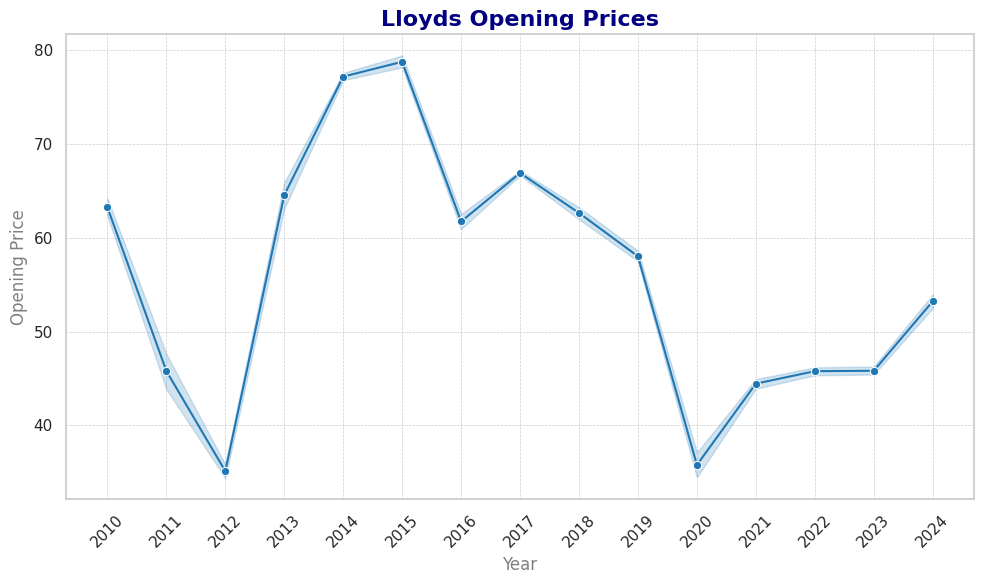

In [19]:
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
years = data.index.year

# Plot Opening Prices
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=data['Open'].values.ravel(), color='#1f77b4', marker='o')
plt.title('Lloyds Opening Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Opening Price', fontsize=12, color='gray')

# Set x-ticks to show unique years
plt.xticks(ticks=range(years.min(), years.max() + 1), rotation=45)

plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Closing Price

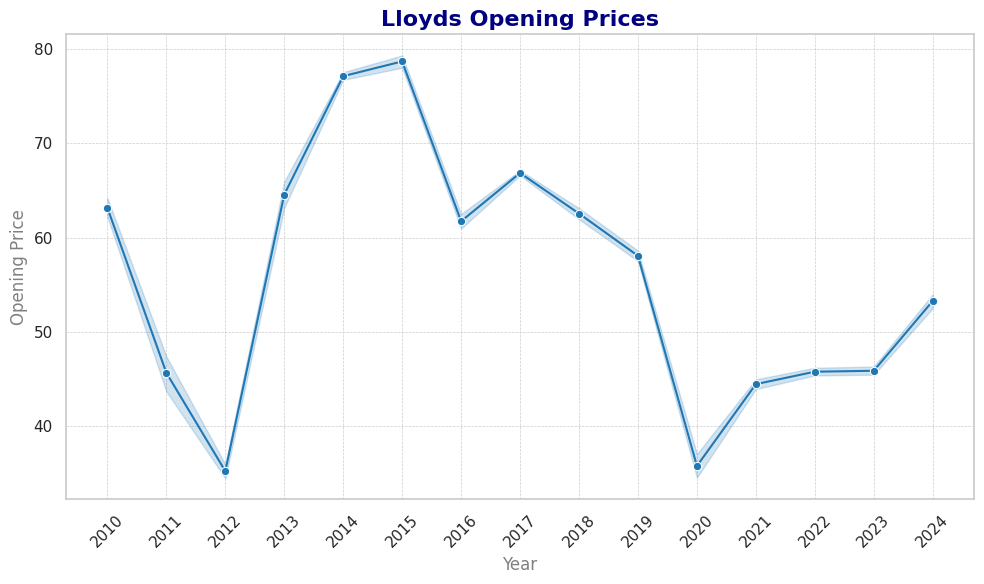

In [21]:
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
years = data.index.year

# Plot Opening Prices
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=data['Close'].values.ravel(), color='#1f77b4', marker='o')
plt.title('Lloyds Opening Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Opening Price', fontsize=12, color='gray')

# Set x-ticks to show unique years
plt.xticks(ticks=range(years.min(), years.max() + 1), rotation=45)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()